In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

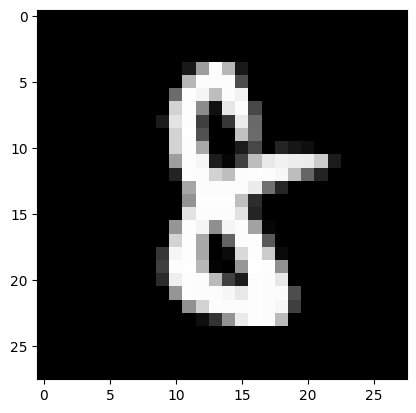

In [5]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [37]:
model = Sequential([
                    # encoder Layers
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder Layers
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])
lr=0.01
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_26 (UpSamplin  (None, 14, 14, 16)     

In [39]:
model.fit(x_train, x_train, epochs=5, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0773 - accuracy: 0.8149 - val_loss: 0.0747 - val_accuracy: 0.8140
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0744 - accuracy: 0.8151 - val_loss: 0.0727 - val_accuracy: 0.8142
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0728 - accuracy: 0.8152 - val_loss: 0.0715 - val_accuracy: 0.8143
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0717 - accuracy: 0.8153 - val_loss: 0.0706 - val_accuracy: 0.8143
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0709 - accuracy: 0.8153 - val_loss: 0.0701 - val_accuracy: 0.8144


In [40]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


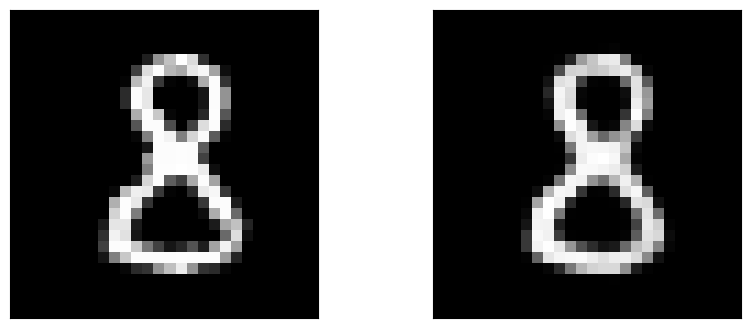

In [41]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

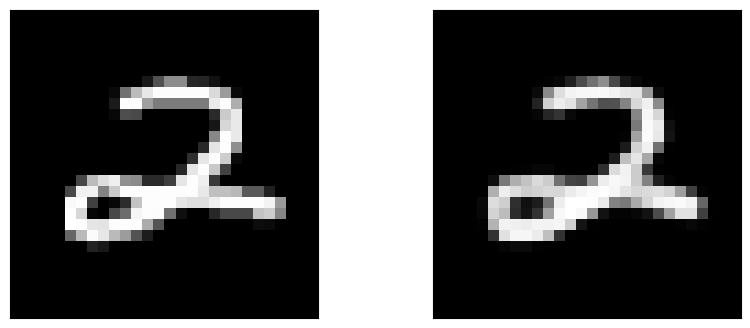

In [42]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

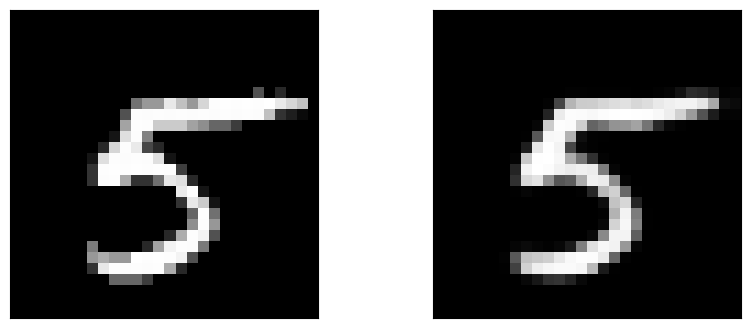

In [43]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()